In [1]:
# Importing libraries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
# Download prices for 5 tickers
tickers = ["AAPL", "AMZN", "META", "TSLA", "GOOGL"]

# Last 3 years of daily data (adjust as you like)
prices = yf.download(tickers, period="3y", auto_adjust="True")

# Basic sanity check
prices.tail()

[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            AAPL        AMZN       GOOGL        META        TSLA   
Date                                                                     
2025-10-13  247.660004  220.070007  244.149994  715.700012  435.899994   
2025-10-14  247.770004  216.389999  245.449997  708.650024  429.239990   
2025-10-15  249.339996  215.570007  251.029999  717.549988  435.149994   
2025-10-16  247.449997  214.470001  251.460007  712.070007  428.750000   
2025-10-17  252.289993  213.039993  253.300003  716.919983  439.309998   

Price             High                                                  ...  \
Ticker            AAPL        AMZN       GOOGL        META        TSLA  ...   
Date                                                                    ...   
2025-10-13  249.690002  220.679993  244.500000  719.940002  436.890015  ...   
2025-10-14  248.850006  219.320007  247.119995  715.549988  434.200012  ...   
2025-10-15  251.820007  217.710007  252.110001  723.900024  440.510010  ...   
2025-10-16  249.039993  218.589996  256.959991  725.489990  439.350006  ...   
2025-10-17  253.380005  214.800003  254.220001  718.539978  441.459991  ...   

Price             Open                                                  \
Ticker            AAPL        AMZN       GOOGL        META        TSLA   
Date                                                                     
2025-10-13  249.380005  217.699997  240.210007  713.010010  423.529999   
2025-10-14  246.600006  215.559998  241.229996  707.780029  426.790009   
2025-10-15  249.490005  216.619995  247.250000  717.059998  434.899994   
2025-10-16  248.250000  215.669998  251.770004  717.549988  434.730011   
2025-10-17  248.020004  214.559998  250.759995  707.080017  425.500000   

Price         Volume                                          
Ticker          AAPL      AMZN     GOOGL      META      TSLA  
Date                                                          
2025-10-13  38142900  37809700  24995000   9251800  79552800  
2025-10-14  35478000  45665600  22111600   8829800  72669400  
2025-10-15  33893600  45909500  27007700  10246800  71558200  
2025-10-16  39777000  42414600  27997200   9017000  77189900  
2025-10-17  48876500  45877900  29586100  12206800  89118900  

[5 rows x 25 columns]

In [3]:
# Compute daily returns

simple_ret = prices.pct_change().dropna()  # For quick summary 
log_ret = np.log(prices).diff().dropna()   # For modeling, simulations and regressions

simple_ret.head(), log_ret.head()

(Price          Close                                              High  \
 Ticker          AAPL      AMZN     GOOGL      META      TSLA      AAPL   
 Date                                                                     
 2022-10-19  0.000765 -0.011086 -0.011313  0.003238  0.008402 -0.011929   
 2022-10-20 -0.003267  0.001564  0.003413 -0.012760 -0.066474  0.006485   
 2022-10-21  0.027059  0.035315  0.011603 -0.011556  0.034543  0.013434   
 2022-10-24  0.014803  0.004190  0.013745 -0.002231 -0.014876  0.016098   
 2022-10-25  0.019337  0.006510  0.019118  0.060052  0.052876  0.015043   
 
 Price                                               ...      Open            \
 Ticker          AMZN     GOOGL      META      TSLA  ...      AAPL      AMZN   
 Date                                                ...                       
 2022-10-19 -0.024515 -0.023679 -0.006094 -0.029980  ... -0.026119 -0.036536   
 2022-10-20  0.014152  0.012869 -0.001679 -0.033105  ...  0.009387 -0.007671  

In [4]:
def describe_returns(df):
    out = pd.DataFrame({
        "mean": df.mean(),
        "median": df.median(),
        "std": df.std(),  # volatility
        "min": df.min(),
        "max": df.max(),
        "skew": df.skew(), # asymmetry
        "kurtosis": df.kurtosis() # Fisher definition; normal = 0
    })
    return out.sort_index()

# In pandas, kurtosis is Fisher's definition (0=normal), positive = fat tails; negative = light tails 

#summary = describe_returns(simple_ret)
summary = describe_returns(log_ret)
summary

mean    median       std       min       max      skew  \
Price  Ticker                                                               
Close  AAPL    0.000769  0.001186  0.017205 -0.097013  0.142617  0.590750   
       AMZN    0.000804  0.000418  0.020927 -0.094081  0.114915  0.109385   
       GOOGL   0.001235  0.002144  0.019726 -0.099924  0.097348 -0.163233   
       META    0.002250  0.001647  0.026428 -0.281794  0.209307 -0.326551   
       TSLA    0.000919  0.000997  0.038897 -0.167546  0.204491  0.144591   
High   AAPL    0.000748  0.001060  0.015312 -0.081861  0.075392  0.063151   
       AMZN    0.000780  0.001271  0.018998 -0.121640  0.100938 -0.058268   
       GOOGL   0.001205  0.000924  0.018270 -0.082611  0.110135  0.250661   
       META    0.002204  0.001730  0.025808 -0.279478  0.249794  0.105506   
       TSLA    0.000868 -0.001411  0.033825 -0.123749  0.181010  0.483023   
Low    AAPL    0.000771  0.001445  0.016080 -0.105049  0.078031 -0.578837   
       AMZN    0.000810  0.002067  0.019895 -0.124687  0.097243 -0.399910   
       GOOGL   0.001216  0.003263  0.018797 -0.094168  0.117319 -0.213640   
       META    0.002244  0.002738  0.025137 -0.287864  0.203005 -1.300860   
       TSLA    0.000888  0.002522  0.036086 -0.180728  0.140005 -0.290415   
Open   AAPL    0.000730  0.000898  0.017869 -0.095999  0.127657  0.126467   
       AMZN    0.000783  0.001392  0.022467 -0.151448  0.134002 -0.249522   
       GOOGL   0.001191  0.001764  0.019808 -0.072741  0.141717  0.550672   
       META    0.002190  0.001858  0.027825 -0.295611  0.214145 -0.880679   
       TSLA    0.000821 -0.001171  0.040524 -0.148535  0.146394  0.255866   
Volume AAPL   -0.000940 -0.013574  0.313616 -1.772503  1.562764  0.039717   
       AMZN   -0.000476 -0.014563  0.317816 -1.145803  1.151516  0.073924   
       GOOGL   0.000275 -0.016885  0.339847 -1.149487  1.790403  0.358072   
       META   -0.000977 -0.014373  0.357162 -1.568648  1.367233  0.328987   
       TSLA    0.000214 -0.018309  0.241578 -0.770872  1.066991  0.483634   

                kurtosis  
Price  Ticker             
Close  AAPL     9.345188  
       AMZN     4.226890  
       GOOGL    4.379909  
       META    27.242616  
       TSLA     2.987077  
High   AAPL     4.069869  
       AMZN     6.075740  
       GOOGL    3.984698  
       META    35.173693  
       TSLA     2.185953  
Low    AAPL     6.322988  
       AMZN     5.531903  
       GOOGL    5.254767  
       META    32.491564  
       TSLA     2.647463  
Open   AAPL     8.207959  
       AMZN     7.214052  
       GOOGL    5.030557  
       META    26.361555  
       TSLA     1.335417  
Volume AAPL     2.932124  
       AMZN     0.781545  
       GOOGL    1.479340  
       META     1.045039  
       TSLA     1.088400

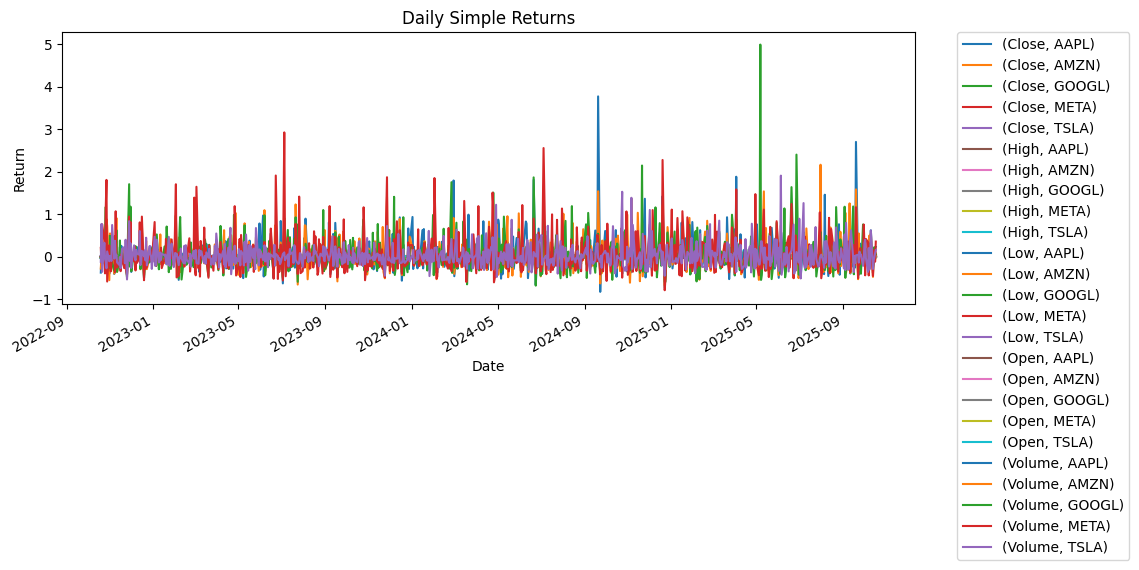

In [5]:
# Plot time series of returns (volatility feeling)

ax = simple_ret.plot(figsize=(11,4), title="Daily Simple Returns")
ax.set_ylabel("Return")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

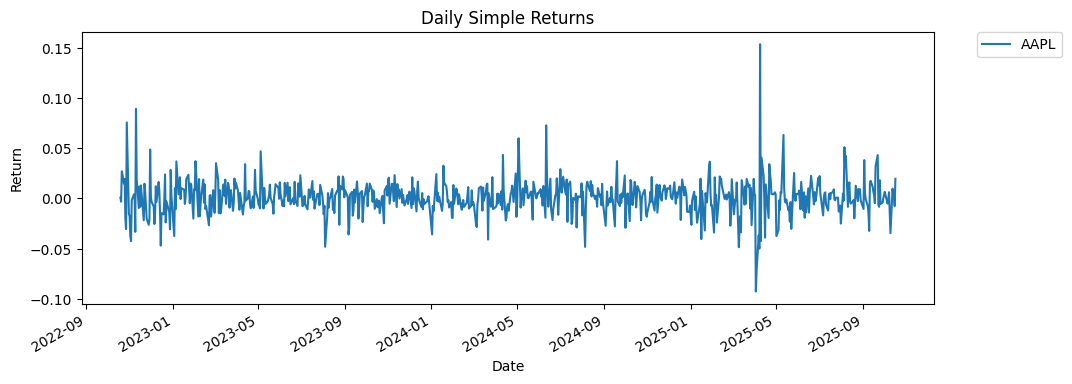

In [6]:
ax2 = simple_ret["Close"]["AAPL"].plot(figsize=(11,4), title="Daily Simple Returns")
ax2.set_ylabel("Return")
plt.legend(loc="upper left", bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

In [8]:
# Histogram + density + normal fit (one ticker)

ticker = "AAPL"
r = simple_ret[ticker].dropna()

# Histogram (density=True normalizes area to 1)
plt.figure(figsize=(7,4))
plt.hist(r, bins=60, density=True, alpha=0.6)
plt.title(f"{ticker} - Daily Returns: Histogram + Normal Fit")
plt.xlabel("Daily return")
plt.ylabel("Density")

# Fit normal using sample mean/std
mu, sigma = r.mean(), r.std()
x = np.linspace(r.min()*1.2, r.max()*1.2, 500)
plt.plot(x, norm.pdf(x, mu, sigma), linewidth=2, label= f"Normal fit mu={mu:.4f}, sigma={sigma:.4f}")

plt.legend()
plt.show()

KeyError: 'AAPL'

In [11]:
prices = data["Adj Close"]  # Select adjusted close prices
simple_ret = prices.pct_change().dropna()


NameError: name 'data' is not defined

In [ ]:
# Fix the error of accessing the full ticker information